<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedHyperParameterOptimisation/blob/BayesianOptimization/ScikitOptimize_ManualSearch_GaussionProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bayesian Optimisation (Gaussian Process)

- Tech - Scikit optimize

- steps : 
- list of parameters grid
- initiate the algorithm objective
- define objctive function
- call gp_minimize
- explore the best parameters
- plot the convergence

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
from sklearn.datasets import load_breast_cancer

In [116]:
dataset = load_breast_cancer()
data = dataset.data
target = dataset.target
columns = dataset.feature_names

In [117]:
df = pd.DataFrame(data = data, columns = columns)
df['target'] = target

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [119]:
X = df.drop('target', axis = 1)
y = df['target']

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.7, random_state = 100)

Initiate a gradient boosting object

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

In [123]:
gbc = GradientBoostingClassifier(random_state = 100)

Install the scikit optimize

In [124]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Creating the parameter space

In [125]:
from skopt.space import Real,Integer,Categorical

In [126]:
# unlike gridsearch, randomised search, scikit optmise take parameter space as a list, not as a dictonary
params_grid = [
    Integer(low = 10, high = 120, name = "n_estimators"),
    Real(low = 0.001, high = 0.999, name = "min_samples_split"),
    Integer(low = 1, high = 5, name = "max_depth"),
    Categorical(categories = ['deviance', 'exponential'], name = "loss"),
]

Creating the object function

In [127]:
from skopt.utils import use_named_args

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
# define the objective function
@use_named_args(params_grid)
def objective(**params):
  
  gbc.set_params(**params)

  cv_scores = np.mean(cross_val_score(estimator = gbc,
                              X = X_train,
                              y = y_train,
                              cv = 5,
                              scoring = 'accuracy',
                              n_jobs = -1))
  
  #mean_score = np.mean(cv_scores) 

  return -cv_scores # the object function always to minimize the function, since we use the accuracy we want to negate the values and maximize the function

Bayesian Optoimisation call

In [130]:
from skopt import gp_minimize

In [131]:
gp = gp_minimize(
    func = objective, # the objective function to minimize
    dimensions = params_grid, # the hyperparameter space
    n_initial_points = 10, # the number of points to evaluate f(x) to start of
    acq_func = 'EI', # the acquisition function
    n_calls = 50, # the number of subsequent evaluations of f(x)
    random_state = 0)

%time

CPU times: user 0 ns, sys: 8 µs, total: 8 µs
Wall time: 7.87 µs


Lets Explore the gp_minimize object

In [136]:
# the best metric - shows - negated value
gp.fun

-0.9622784810126582

In [137]:
# the best parameters of search
gp.x

[120, 0.001, 1, 'exponential']

lets evaluate the convergence

In [140]:
from skopt.plots import plot_convergence

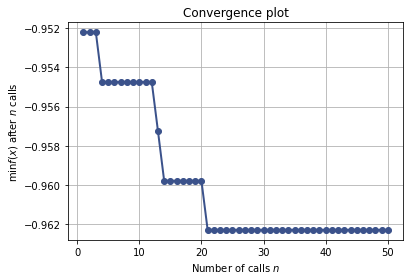

In [142]:
plot_convergence(gp)
plt.show()